<a href="https://colab.research.google.com/github/jigarbhalsod/ML-Launch/blob/main/22Sept2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("I'm the king of the World")

I'm the king of the World


# DATA UNDERSTANDING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('crocodile_dataset.csv')

In [ ]:
print(df.shape)
df.describe()

(1000, 15)


,Observation ID,Observed Length (m),Observed Weight (kg)
count,1000.000000,1000.000000,1000.000000
mean,500.500000,2.415110,155.771900
std,288.819436,1.097542,175.186788
min,1.000000,0.140000,4.400000
25%,250.750000,1.637500,53.225000
50%,500.500000,2.430000,100.600000
75%,750.250000,3.010000,168.875000
max,1000.000000,6.120000,1139.700000


In [ ]:
df.head()

,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


In [ ]:
df.columns

Index(['Observation ID', 'Common Name', 'Scientific Name', 'Family', 'Genus',
       'Observed Length (m)', 'Observed Weight (kg)', 'Age Class', 'Sex',
       'Date of Observation', 'Country/Region', 'Habitat Type',
       'Conservation Status', 'Observer Name', 'Notes'],
      dtype='object')

In [ ]:
df.dtypes

,0
Observation ID,int64
Common Name,object
Scientific Name,object
Family,object
Genus,object
Observed Length (m),float64
Observed Weight (kg),float64
Age Class,object
Sex,object
Date of Observation,object


# DATA PREPERATION

Dropping irrelevant columns and rows<br>
Identifying duplicated columns<br>
Renaming Columns<br>
Feature Creation

In [ ]:
df = df[[ 'Observation ID', 'Common Name',  'Family', 'Observed Length (m)',	'Observed Weight (kg)', 'Country/Region', 'Conservation Status', 'Observer Name' ]]

In [ ]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].str.capitalize()

df.columns

Index(['Observation ID', 'Common Name', 'Family', 'Observed Length (m)',
       'Observed Weight (kg)', 'Country/Region', 'Conservation Status',
       'Observer Name'],
      dtype='object')

df.isna().sum()<br>
a count of missing values in each column of the DataFrame.

In [ ]:
df.isna().sum()

,0
Observation ID,0
Common Name,0
Family,0
Observed Length (m),0
Observed Weight (kg),0
Country/Region,0
Conservation Status,0
Observer Name,0


In [ ]:
df.loc[df.duplicated()]

,Observation ID,Common Name,Family,Observed Length (m),Observed Weight (kg),Country/Region,Conservation Status,Observer Name


In [ ]:
df.query('`Conservation Status` == "Vulnerable"')

,Observation ID,Common Name,Family,Observed Length (m),Observed Weight (kg),Country/Region,Conservation Status,Observer Name
1,2,American crocodile,Crocodylidae,4.09,334.5,Venezuela,Vulnerable,Brandon hall
4,5,Mugger crocodile (marsh crocodile),Crocodylidae,3.75,269.4,India,Vulnerable,Donald reid
5,6,Mugger crocodile (marsh crocodile),Crocodylidae,2.64,137.4,India,Vulnerable,Randy brown
10,11,West african dwarf crocodile,Crocodylidae,1.22,15.8,Liberia,Vulnerable,Betty alvarez
13,14,American crocodile,Crocodylidae,3.65,217.7,Mexico,Vulnerable,Timothy duncan
...,...,...,...,...,...,...,...,...
951,952,American crocodile,Crocodylidae,3.67,269.8,Cuba,Vulnerable,Tyler welch md
972,973,American crocodile,Crocodylidae,3.25,204.5,Cuba,Vulnerable,Jonathan rivas
980,981,West african dwarf crocodile,Crocodylidae,1.01,11.3,Sierra leone,Vulnerable,David tapia
985,986,Mugger crocodile (marsh crocodile),Crocodylidae,2.54,113.2,Iran (historic),Vulnerable,Dylan rivera


In [ ]:
df = df.loc[~df.duplicated(subset=['Common Name','Family','Country/Region'])] \
    .reset_index(drop=True).copy()

df

,Observation ID,Common Name,Family,Observed Length (m),Observed Weight (kg),Country/Region,Conservation Status,Observer Name
0,1,Morelet's crocodile,Crocodylidae,1.90,62.0,Belize,Least concern,Allison hill
1,2,American crocodile,Crocodylidae,4.09,334.5,Venezuela,Vulnerable,Brandon hall
2,3,Orinoco crocodile,Crocodylidae,1.08,118.2,Venezuela,Critically endangered,Melissa peterson
3,4,Morelet's crocodile,Crocodylidae,2.42,90.4,Mexico,Least concern,Edward fuller
4,5,Mugger crocodile (marsh crocodile),Crocodylidae,3.75,269.4,India,Vulnerable,Donald reid
...,...,...,...,...,...,...,...,...
59,168,Nile crocodile,Crocodylidae,3.85,479.0,Uganda,Least concern,Jessica jordan
60,204,Mugger crocodile (marsh crocodile),Crocodylidae,2.25,104.2,Sri lanka,Vulnerable,Judy adkins
61,236,West african slender-snouted crocodile,Crocodylidae,2.07,93.2,Côte d'ivoire,Critically endangered,James bailey
62,250,American crocodile,Crocodylidae,2.80,165.3,Cuba,Vulnerable,Susan watts


# Step 3: Feature Understanding
(Univariate analysis)

Plotting Feature Distributions<br>
Histogram<br>
KDE<br>
Boxplot<br>

In [ ]:
df['Observed Weight (kg)'].value_counts()

,count
Observed Weight (kg),
62.0,1
334.5,1
118.2,1
90.4,1
269.4,1
...,...
479.0,1
104.2,1
93.2,1


In [ ]:
df['Conservation Status'].value_counts()

,count
Conservation Status,
Least concern,26
Vulnerable,17
Critically endangered,14
Data deficient,4
Endangered,3


# Step 4: Feature Relationships¶
Scatterplot<br>
Heatmap Correlation<br>
Pairplot<br>
Groupby comparisons<br>

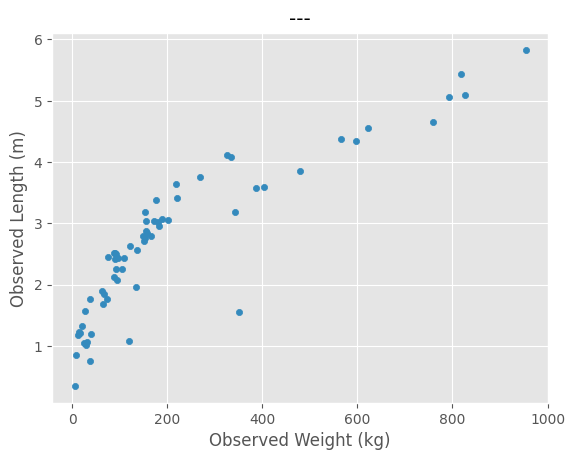

In [ ]:
df.plot(kind='scatter',
        x='Observed Weight (kg)',
        y='Observed Length (m)',
        title='---')
plt.show()

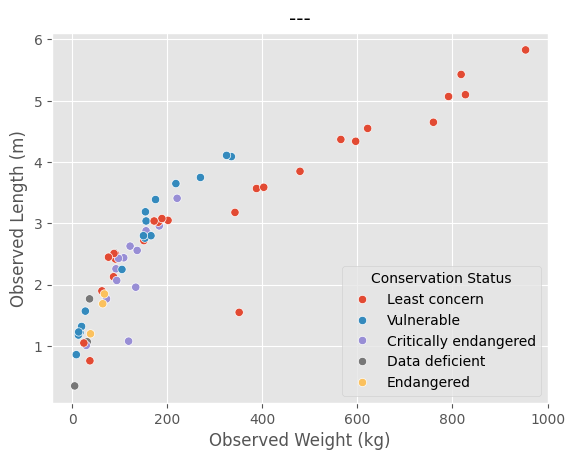

In [ ]:
ax = sns.scatterplot(x='Observed Weight (kg)',
                y='Observed Length (m)',
                hue='Conservation Status',
                data=df)
ax.set_title('---')
plt.show()

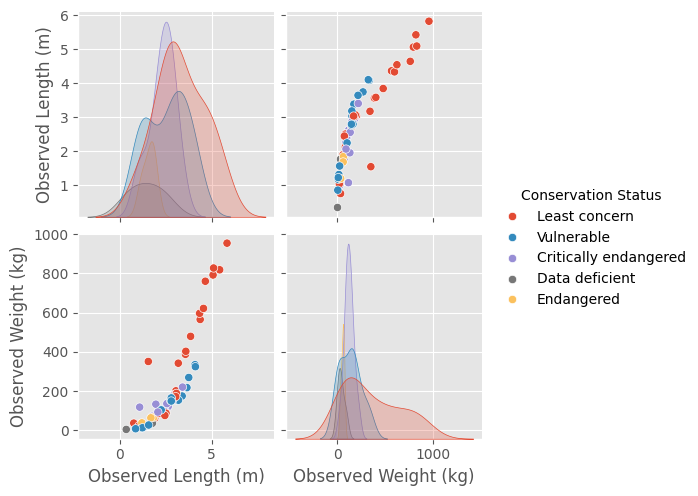

In [ ]:
sns.pairplot(df,
             vars=['Observed Length (m)',
                   'Observed Weight (kg)'],
            hue='Conservation Status')
plt.show()

In [ ]:
numerical_cols = df.select_dtypes(include=np.number).columns
df_corr = df[numerical_cols].corr()
df_corr

,Observation ID,Observed Length (m),Observed Weight (kg)
Observation ID,1.000000,0.091002,0.030430
Observed Length (m),0.091002,1.000000,0.880988
Observed Weight (kg),0.030430,0.880988,1.000000


<Axes: >

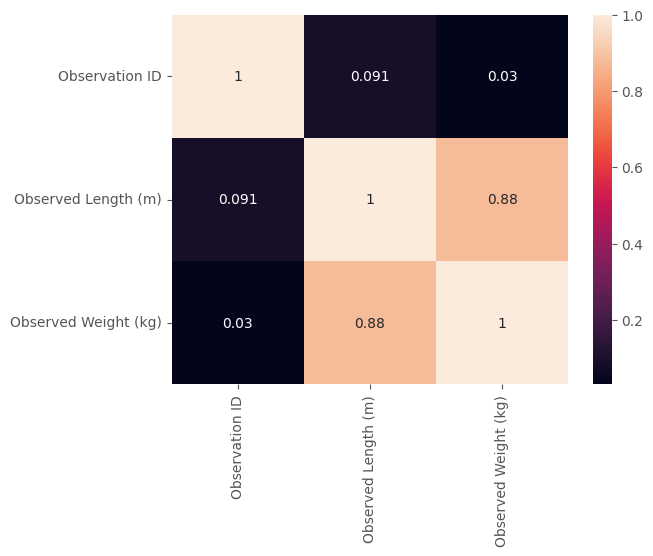

In [ ]:
sns.heatmap(df_corr, annot=True)

<Axes: >

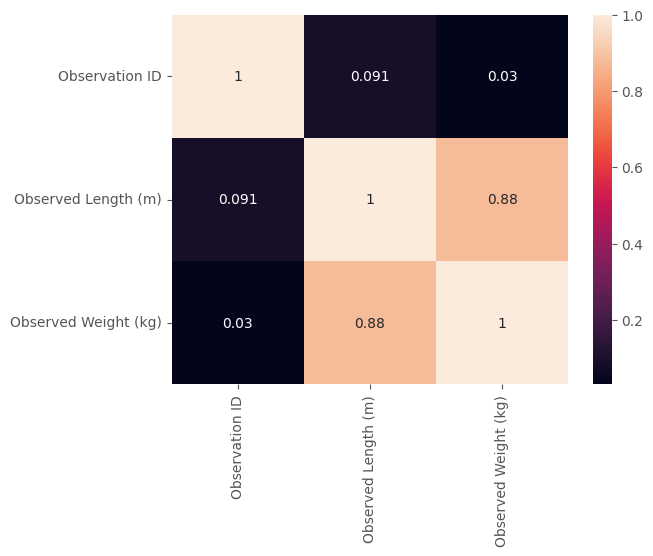

In [ ]:
sns.heatmap(df_corr, annot=True)

# LINEAR REGRESSION FROM SCRATCH